In [320]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [264]:
def plot_permutation(P):
    n = len(P)
    x_values = [i for i in range(n)]
    y_values = P
    plt.scatter(x_values,y_values, label = str(P))

In [3]:
def unrank_permutation(n_list,d):
    n = len(n_list)
    nn_list = [h for h in n_list]
    if d == 0:
        return nn_list
    for k in range(n):
        if d < (k+1)*np.math.factorial(n-1):
            nn_list.remove(n_list[k])
            return [n_list[k]] + unrank_permutation(nn_list,d - k*np.math.factorial(n-1)) 

In [ ]:
def relative_order(p):
    '''takes a list of n distinct integers and returns the permutation from 0 to n-1 with the same relative order.'''
    n = len(p)
    SP = sorted(p)
    output = [0]*n
    for i in range(n):
        ind = SP.index(p[i])
        output[i] = ind
    return output

In [4]:
def count_132(permutation):
    P = permutation
    n = len(P)
    C = 0
    for i in range(n-2):
        for j in range(i+1,n-1):
            for k in range(j+1,n):
                if (P[i]<P[k]) and (P[k]<P[j]):
                    C = C + 1
    return C

In [308]:
def count_2413(permutation):
    P = permutation
    n = len(P)
    C = 0
    for i in range(n-3):
        for j in range(i+1,n-2):
            if P[i] < P[j]:
                for k in range(j+1,n-1):
                    if P[k] < P[i]:
                        for l in range(k+1,n):
                            if P[i] < P[l] and P[l] < P[j]:
                                C = C + 1
    return C

In [316]:
def count_1342(permutation):
    P = permutation
    n = len(P)
    C = 0
    for i in range(n-3):
        for j in range(i+1,n-2):
            if P[i] < P[j]:
                for k in range(j+1,n-1):
                    if P[j] < P[k]:
                        for l in range(k+1,n):
                            if P[i] < P[l] and P[l] < P[j]:
                                C = C + 1
    return C

In [287]:
relative_order([2,4,1,3])==[1,3,0,2]

True

In [288]:
count_2413([2,4,1,3])

[0, 1, 2, 3]


1

In [5]:
r = random.randint(0,np.math.factorial(27))
print(r)
perm = unrank_permutation([i for i in range(27)],r)
print(perm)
count_132(perm)

10232434960463960137470397268
[25, 9, 17, 26, 24, 22, 8, 16, 18, 20, 2, 1, 7, 11, 23, 12, 15, 6, 0, 19, 3, 10, 13, 21, 5, 4, 14]


300

In [6]:
1 in [0]*4

False

Crossover 1:

This first crossover function is something simple that I made up quickly.

The way it works is that it takes two permutations P1 and P2.
The first step is to choose the first element of the offspring permutation. It will be chosen from the first element of P1 or P2 at random (1/2 probability for each parent.)

Then for each subsequent element (element i), you choose which parent to inherit it from at random (1/2 probability for each parent.)  Suppose you chose P1. Then you would look at the ith element of P1. If that element has already been assigned to the offspring, then look at the next element i+1. Keep going until you find an element that has not been assigned to the offspring yet (cycling around if needed.) Once you find an element, put that as the ith element of the offspring.

In [7]:
def crossover1(P1,P2):
    n = len(P1)
    offspring = [-1]*n
    r = random.random()
    if r < 0.5:
        offspring[0] = P1[0]
    else:
        offspring[0] = P2[0]
    for i in range(2,n):
        r = random.random()
        if r < 0.5:
            j = i
            while P1[j] in offspring:
                j = (j+1) % n
            offspring[i] = P1[j]
        else:
            j = i
            while P2[j] in offspring:
                j = (j+1) % n
            offspring[i] = P2[j]
    return offspring
            
        

In [8]:
r = random.randint(0,np.math.factorial(27))
P1 = unrank_permutation([i for i in range(27)],r)
r = random.randint(0,np.math.factorial(27))
P2 = unrank_permutation([i for i in range(27)],r)
print(P1)
print(count_132(P1))
print(P2)
print(count_132(P2))
OS = crossover1(P1,P2)
print(OS)
print(count_132(OS))

[1, 12, 3, 10, 13, 24, 2, 11, 6, 9, 4, 22, 25, 5, 19, 23, 8, 21, 17, 16, 14, 26, 0, 15, 18, 7, 20]
728
[23, 3, 22, 2, 8, 19, 0, 24, 9, 11, 13, 12, 16, 4, 26, 14, 20, 6, 15, 1, 17, 21, 10, 5, 18, 25, 7]
498
[23, -1, 22, 10, 13, 19, 0, 24, 9, 11, 4, 25, 5, 26, 8, 14, 21, 6, 15, 16, 18, 7, 3, 2, 20, 12, 1]
501


Crossover from the book (Introduction to Evolutionary Computing) "Cut-and-crossfill"

1. Select a random position., the crossover point i in {1...n-1}
2. Cut both parents into two segments after this position. (If 0-indexed then cut before the position.)
3. Copy the first segment of parent 1 into child 1 and the first segment of parent 2 into child 2.
4. Scan parent 2 from left to right and fill the second segment of child 1 with values from parent 2, skipping those that it already contains.
5. Do the same with child 2

In [9]:
def crossover2(P1,P2):
    n = len(P1)
    child1 = [-1]*n
    child2 = [-1]*n
    r = random.randint(1,n-1)
    for i in range(r):
        child1[i] = P1[i]
        child2[i] = P2[i]
    j = r
    while j < n:
        for k in range(n):
            if P2[k] not in child1:
                child1[j] = P2[k]
                j=j+1
    j = r
    while j < n:
        for k in range(n):
            if P1[k] not in child2:
                child2[j] = P1[k]
                j = j+1
    print('r = ',r)
    return [child1,child2]

In [10]:
r = random.randint(0,np.math.factorial(27)-1)
P1 = unrank_permutation([i for i in range(27)],r)
r = random.randint(0,np.math.factorial(27)-1)
P2 = unrank_permutation([i for i in range(27)],r)
print(P1)
print(count_132(P1))
print(P2)
print(count_132(P2))
[C1,C2] = crossover2(P1,P2)
print('C1', C1)
print('C2', C2)
print(count_132(C1))
print(count_132(C2))


[7, 16, 1, 19, 22, 18, 26, 3, 11, 6, 23, 12, 13, 25, 21, 15, 5, 4, 0, 10, 14, 2, 20, 8, 24, 9, 17]
497
[20, 9, 22, 6, 26, 12, 19, 17, 15, 25, 21, 3, 16, 14, 2, 24, 18, 5, 11, 4, 23, 1, 7, 8, 10, 13, 0]
319
r =  5
C1 [7, 16, 1, 19, 22, 20, 9, 6, 26, 12, 17, 15, 25, 21, 3, 14, 2, 24, 18, 5, 11, 4, 23, 8, 10, 13, 0]
C2 [20, 9, 22, 6, 26, 7, 16, 1, 19, 18, 3, 11, 23, 12, 13, 25, 21, 15, 5, 4, 0, 10, 14, 2, 8, 24, 17]
504
409


Mark's cross-over (Introduction to Evolutionary Computing) "Cut-and-pattern"

1. Select a random position., the crossover point i in {1...n-1}
2. Cut both parents into two segments after this position. (If 0-indexed then cut before the position.)
3. Copy the first segment of parent 1 into child 1 and the first segment of parent 2 into child 2.
4. Fill the remaining elements of child 1 in the same relative order as the second half of parent 2 (after the cut.)
5. Do the same with child 2

In [14]:
relative_order([6,2,8,1])

[2, 1, 3, 0]

In [180]:
def crossover3(P1,P2):
    n = len(P1)
    child1 = [-1]*n
    child2 = [-1]*n
    r = random.randint(1,n-1)
    for i in range(r):
        child1[i] = P1[i]
        child2[i] = P2[i]
    RO1 = relative_order(P1[r:])
    RO2 = relative_order(P2[r:])
    k = 0
    for i in range(n):
        if i not in child1:
            child1[r+RO2.index(k)] = i
            k = k+1
    k=0
    for i in range(n):
        if i not in child2:
            child2[r+RO1.index(k)] = i
            k = k+1
    return [child1,child2]

In [181]:
r = random.randint(0,np.math.factorial(15))
P1 = unrank_permutation([i for i in range(15)],r)
r = random.randint(0,np.math.factorial(15))
P2 = unrank_permutation([i for i in range(15)],r)

In [182]:
print(P1)
print(P2)
crossover3(P1,P2)

[13, 11, 0, 1, 3, 6, 10, 9, 7, 14, 2, 4, 8, 12, 5]
[5, 0, 6, 4, 1, 14, 7, 13, 3, 11, 8, 9, 10, 2, 12]


[[13, 11, 4, 3, 0, 14, 5, 12, 2, 9, 6, 7, 8, 1, 10],
 [5, 0, 1, 2, 4, 8, 12, 11, 9, 14, 3, 6, 10, 13, 7]]

Mutation 1: insertion mutation:
Two positions are chosen at random. (if the positions are the samee, no mutation occurs.) The first position is moved next to the second position and the rest of the elements are shifted.

(If the value in the first position is to the left of the second position, then the value of the first position moves to the right just before the value in the second position. and if the value of the first position is to the right of the second position then the value of the first position moves to the left just after the value of the second position.)

In [171]:
def mut1(Perm,r1,r2):
    n = len(Perm)
    output = [i for i in Perm]
    if r1 == r2:
        return(Perm)
    output[r1+1]=Perm[r2]
    for i in range(r1+2,r2+1):
        output[i] = Perm[i-1]
    return output

def mutation1(Perm):
    n = len(Perm)
    r1 = random.randint(0,n-1)
    r2 = random.randint(0,n-1)
    if r1<=r2:
        return mut1(Perm,r1,r2)
    else:
        REV = [Perm[n-1-j] for j in range(n)]
        output = mut1(REV,r2,r1)
        return [output[n-1-j] for j in range(n)]
        
    

In [172]:
Psort = [i for i in range(15)]
print(Psort)
mutation1(Psort)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 6, 13, 14]

Starting the evolutionary algorithm based loosely on 8-queens problem from book (Eiben & Smith) on page 24. This first EA will optimize permutations for number of 132 occurrences.

We will start with a population of 1000 individuals. Pick 5 randomly and choose the best 2 out of 5 to be the parents. We will create 2 offspring and kill off the 2 worst individuals.

We will run this until 10,000 fitness evaluations (after initialization) occur.

In [271]:
def Evolutionary_Algorithm_132(n):
    #initialize population and compute fitness for each individual
    POP = []
    for j in range(5000):
        r = random.randint(0,np.math.factorial(n)-1)
        P = unrank_permutation([i for i in range(n)],r)
        fitness = count_132(P)
        POP = POP + [[fitness,P]]
    #sort initial population from most fit to least fit.
    POP.sort()
    POP.reverse()
    #initialize a counter for fitness evaluations
    fe = 0
    #start the loop
    while(fe<50001):
        #randomly select 5 from the pop
        randomset = random.sample(POP,100)
        #select the top 2 out of 5 for parents and crossover
        randomset.sort()
        P1 = randomset[-1]
        P2 = randomset[-2]
        [child1,child2] = crossover3(P1[1],P2[1])
        #apply mutation to the offspring at a 80% mutation rate
        mr = random.random()
        if mr < 0.8:
            child1 = mutation1(child1)
            child2 = mutation1(child2)
        #compute fitness for each child and increment the fitness evaluation counter
        fitness1 = count_132(child1)
        fitness2 = count_132(child2)
        fe = fe+2
        #include the offspring into the population, resort and delete the 2 weakest individuals.
        POP = POP + [[fitness1,child1]]
        POP = POP + [[fitness2,child2]]
        POP.sort()
        POP.reverse()
        POP[:5000]
        if fe % 2500 == 0:
            print([fe],[POP[j][0] for j in range(10)],[POP[-1][0]])
            plot_permutation(POP[0][1])
            plt.show()
    return POP
    
    
    
    
    

[2500] [31114, 30534, 30534, 30396, 30361, 30341, 30339, 30095, 30082, 30067] [8337]


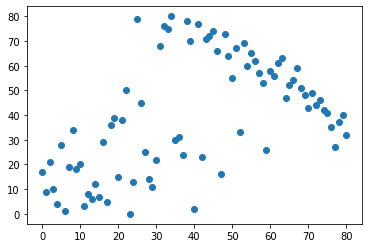

[5000] [33957, 33922, 33914, 33878, 33781, 33756, 33743, 33712, 33677, 33664] [8337]


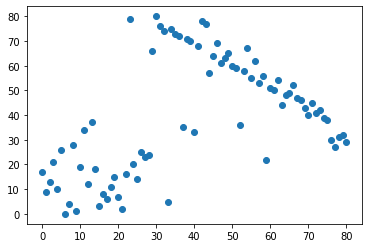

[7500] [36126, 35826, 35815, 35651, 35609, 35598, 35598, 35596, 35579, 35565] [8337]


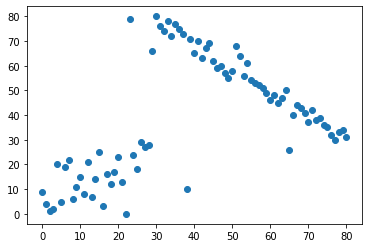

[10000] [36942, 36922, 36920, 36914, 36805, 36803, 36774, 36772, 36758, 36712] [8337]


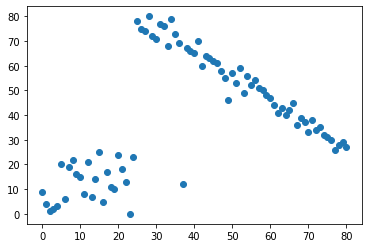

[12500] [37505, 37476, 37461, 37461, 37425, 37387, 37385, 37377, 37367, 37353] [8337]


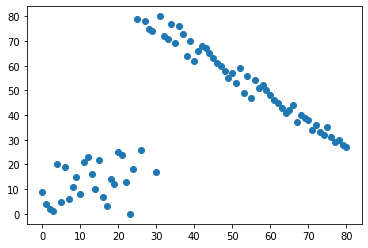

[15000] [37791, 37717, 37707, 37691, 37683, 37672, 37649, 37646, 37644, 37642] [8337]


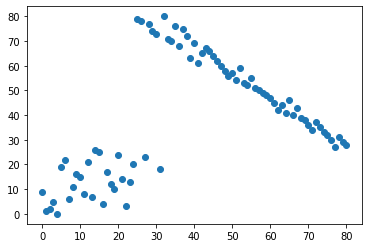

[17500] [37931, 37920, 37890, 37850, 37846, 37845, 37835, 37829, 37828, 37817] [8337]


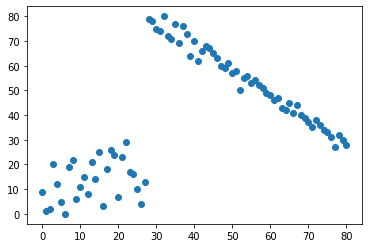

[20000] [38250, 38237, 38222, 38222, 38221, 38180, 38179, 38175, 38172, 38150] [8337]


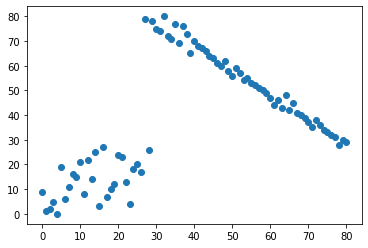

[22500] [38384, 38344, 38325, 38319, 38293, 38284, 38282, 38277, 38267, 38264] [8337]


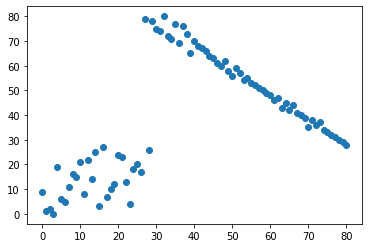

[25000] [38559, 38513, 38509, 38496, 38476, 38474, 38458, 38430, 38416, 38403] [8337]


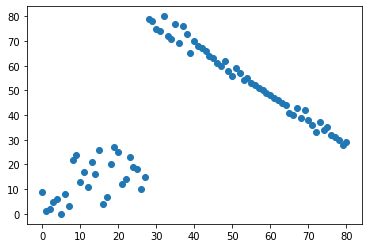

[27500] [38679, 38668, 38630, 38618, 38615, 38601, 38589, 38577, 38559, 38553] [8337]


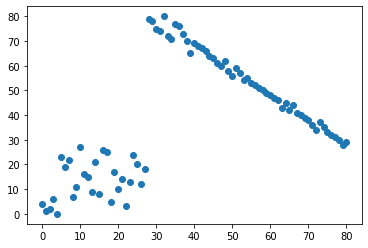

[30000] [38777, 38757, 38734, 38701, 38696, 38696, 38679, 38679, 38675, 38668] [8337]


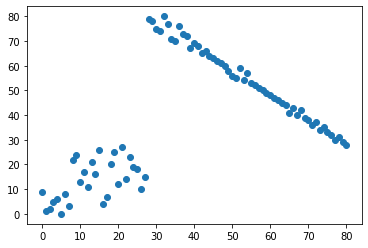

[32500] [38794, 38789, 38789, 38777, 38777, 38776, 38776, 38759, 38757, 38750] [8337]


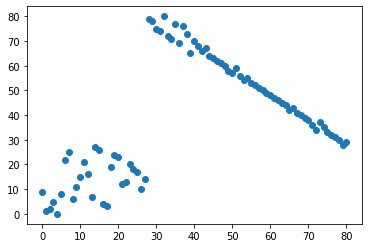

[35000] [39001, 38949, 38933, 38874, 38874, 38865, 38862, 38855, 38845, 38835] [8337]


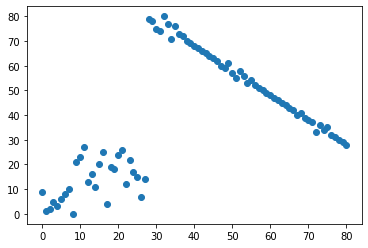

[37500] [39001, 38969, 38960, 38949, 38933, 38926, 38924, 38894, 38893, 38892] [8337]


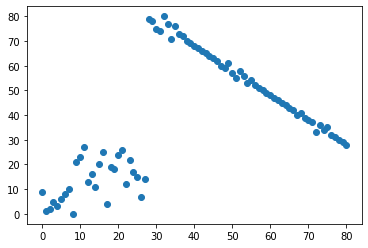

[40000] [39043, 39021, 39018, 39001, 39000, 38999, 38994, 38989, 38985, 38983] [8337]


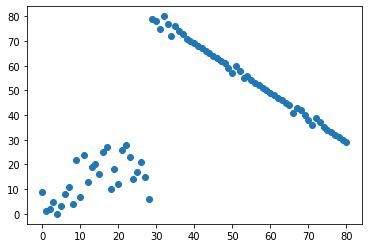

[42500] [39115, 39112, 39070, 39068, 39060, 39057, 39057, 39043, 39043, 39041] [8337]


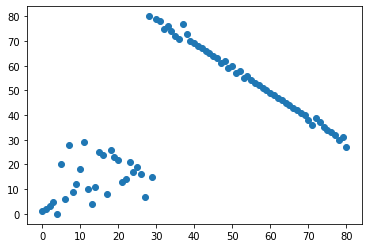

[45000] [39191, 39147, 39147, 39139, 39131, 39115, 39112, 39110, 39106, 39104] [8337]


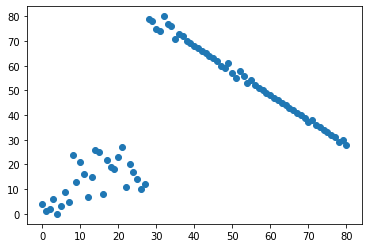

[47500] [39248, 39234, 39191, 39188, 39178, 39176, 39174, 39174, 39172, 39168] [8337]


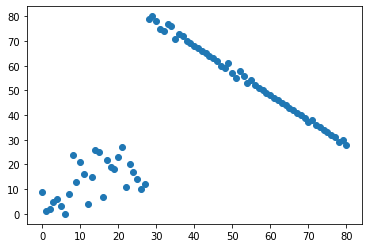

[50000] [39288, 39277, 39256, 39253, 39253, 39251, 39248, 39245, 39236, 39235] [8337]


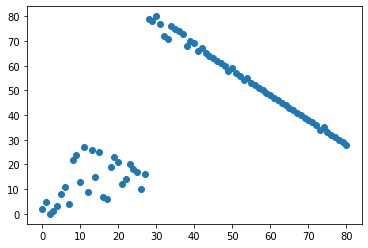

In [272]:
final_pop = Evolutionary_Algorithm_132(81)

[4] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


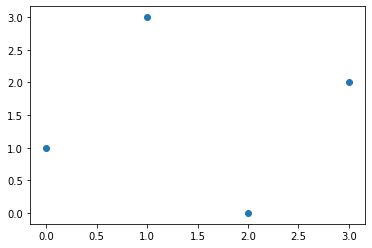

[5] [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


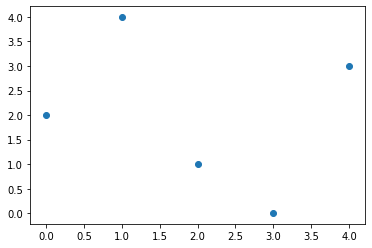

[6] [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


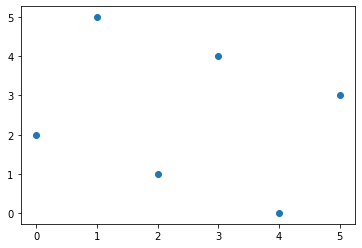

[7] [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]


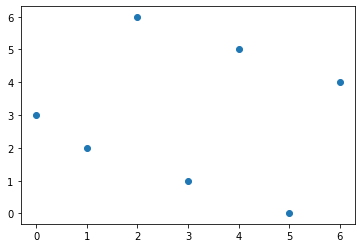

[8] [17, 17, 17, 17, 17, 17, 17, 17, 17, 17]


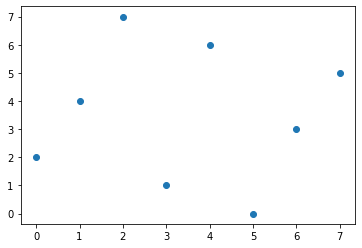

[9] [26, 26, 26, 26, 26, 26, 26, 26, 26, 26]


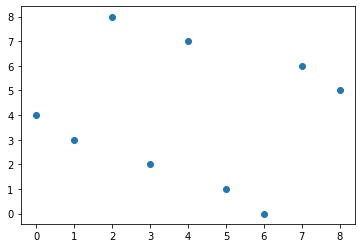

[10] [41, 41, 41, 41, 41, 41, 41, 41, 41, 41]


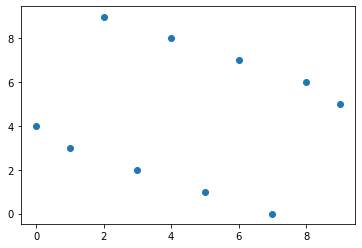

[11] [60, 60, 60, 60, 60, 60, 60, 60, 60, 60]


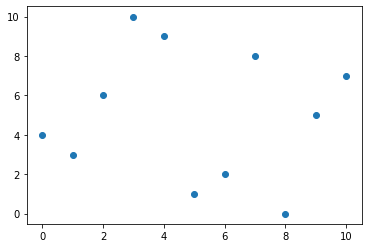

[12] [88, 88, 88, 88, 88, 88, 88, 88, 88, 88]


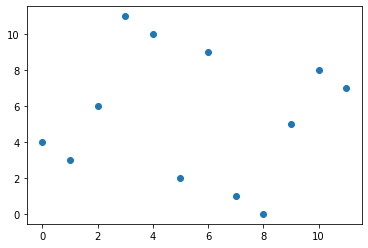

[13] [120, 120, 120, 120, 120, 120, 120, 120, 120, 120]


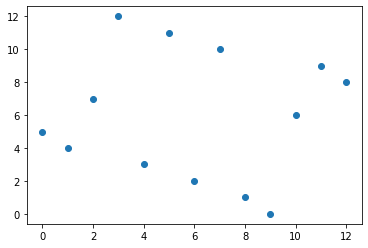

[14] [163, 163, 163, 163, 163, 163, 163, 163, 163, 163]


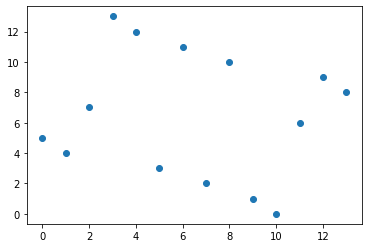

[15] [213, 213, 213, 213, 213, 213, 213, 213, 213, 213]


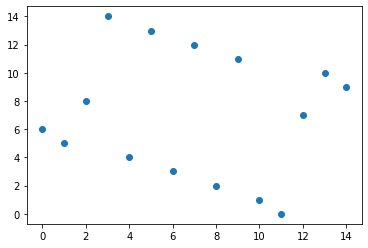

[16] [279, 279, 279, 279, 279, 279, 279, 279, 279, 279]


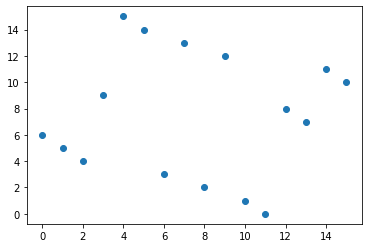

[17] [353, 353, 353, 353, 353, 353, 353, 353, 353, 353]


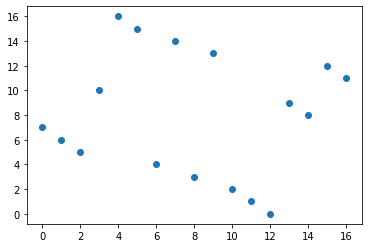

[18] [449, 449, 449, 449, 449, 449, 449, 449, 449, 449]


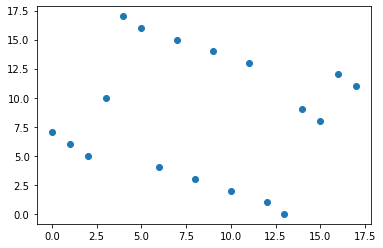

[19] [556, 556, 556, 556, 556, 556, 556, 556, 556, 556]


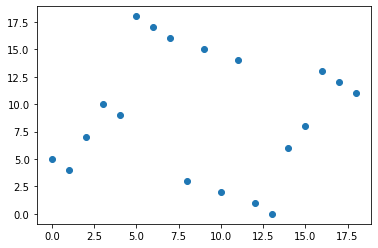

[20] [684, 684, 684, 684, 684, 684, 684, 684, 684, 684]


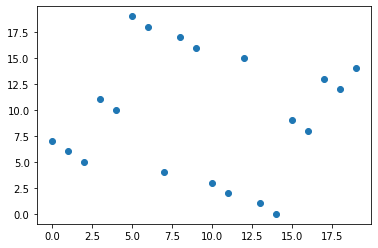

[21] [825, 825, 825, 825, 825, 825, 825, 825, 825, 825]


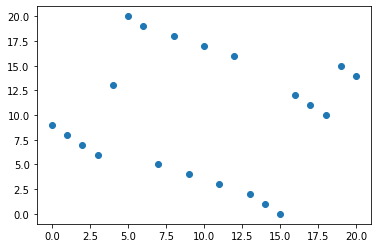

[22] [1007, 1007, 1007, 1007, 1007, 1007, 1007, 1007, 1007, 1007]


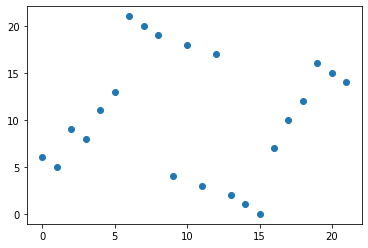

[23] [1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200]


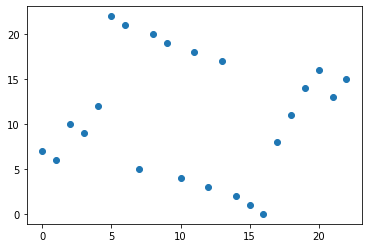

[24] [1438, 1438, 1438, 1438, 1438, 1438, 1438, 1438, 1438, 1438]


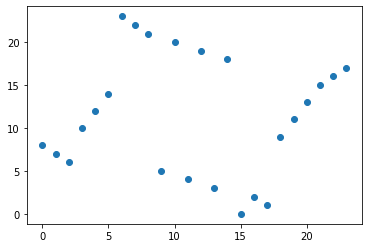

[25] [1671, 1671, 1671, 1671, 1671, 1671, 1671, 1671, 1671, 1671]


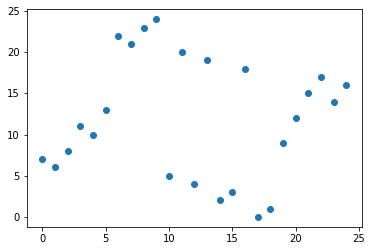

[26] [1968, 1968, 1968, 1968, 1968, 1968, 1968, 1968, 1968, 1968]


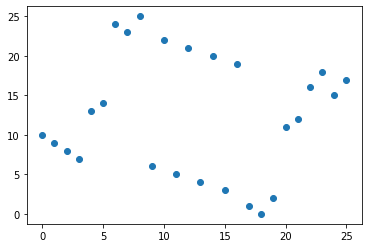

[27] [2295, 2295, 2295, 2295, 2295, 2295, 2295, 2294, 2294, 2294]


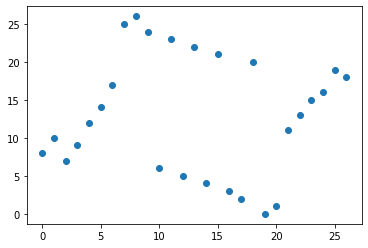

In [293]:
#This will generate a sequence to check against OEIS
for n in range(4,28):
    #initialize population and compute fitness for each individual
    POP = []
    for j in range(2500):
        r = random.randint(0,np.math.factorial(n)-1)
        P = unrank_permutation([i for i in range(n)],r)
        fitness = count_2413(P)
        POP = POP + [[fitness,P]]
    #sort initial population from most fit to least fit.
    POP.sort()
    POP.reverse()
    #initialize a counter for fitness evaluations
    fe = 0
    #start the loop
    while(fe<20001):
        #randomly select 5 from the pop
        randomset = random.sample(POP,75)
        #select the top 2 out of 5 for parents and crossover
        randomset.sort()
        P1 = randomset[-1]
        P2 = randomset[-2]
        [child1,child2] = crossover3(P1[1],P2[1])
        #apply mutation to the offspring at a 80% mutation rate
        mr = random.random()
        if mr < 0.8:
            child1 = mutation1(child1)
            child2 = mutation1(child2)
        #compute fitness for each child and increment the fitness evaluation counter
        fitness1 = count_2413(child1)
        fitness2 = count_2413(child2)
        fe = fe+2
        #include the offspring into the population, resort and delete the 2 weakest individuals.
        POP = POP + [[fitness1,child1]]
        POP = POP + [[fitness2,child2]]
        POP.sort()
        POP.reverse()
        POP[:2500]
    print([n],[POP[j][0] for j in range(10)])
    plot_permutation(POP[0][1])
    plt.show()

Result: using crossover 3, mutation1, population of 100, random selection among 5 individuals, mutation rate of 80% and 100,000 fitness evalutations (After initialization) we get that the densest 132 permutation of length 27 is:
[0,2,4,3,7,5,12,6,1,26,25,23,24,22,21,20,19,18,17,16,15,13,14,10,11,9,8]

with 1335 occurrences.

and its shape is:

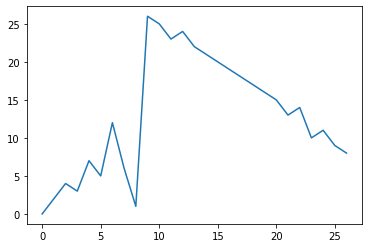!
(It took a while!!)


Next, we'll try using crossover 3, mutation1, population of 1000, random selection among 25 individuals, mutation rate of 60% and 100,000 fitness evalutations (After initialization)

(25 minutes later:) with 1424 occurrences:
[0,2,1,9,8,7,6,5,4,3,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10]

and its shape is:

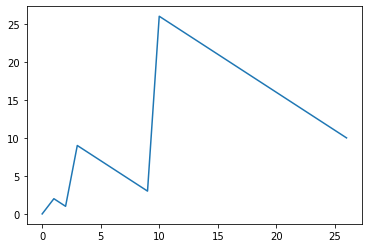

For some reason, this seems like the best since the shape is simple. Let's try again but with fewer fitness evaluations (20,000) and we will monitor the leading individual every 1,000. (Everythin else the same as the last one since it seemed to work better.)

This is what it printed:

[1199, [3, 2, 1, 0, 7, 9, 4, 5, 6, 26, 24, 21, 18, 25, 8, 23, 22, 20, 13, 16, 19, 15, 17, 12, 11, 14, 10]]
[1232, [3, 2, 1, 0, 7, 9, 4, 5, 6, 24, 26, 21, 18, 25, 8, 23, 22, 19, 17, 16, 20, 15, 14, 12, 11, 13, 10]]
[1286, [3, 2, 1, 0, 7, 9, 4, 5, 6, 26, 24, 21, 25, 23, 8, 22, 20, 18, 17, 16, 15, 19, 14, 13, 12, 11, 10]]
[1315, [4, 2, 1, 7, 3, 0, 9, 5, 6, 26, 24, 25, 8, 23, 22, 20, 18, 21, 19, 17, 16, 15, 13, 14, 12, 11, 10]]
[1337, [4, 2, 1, 0, 7, 9, 3, 5, 6, 26, 25, 24, 23, 20, 22, 19, 21, 15, 18, 17, 16, 14, 13, 12, 11, 10, 8]]
[1343, [4, 2, 1, 0, 7, 9, 3, 5, 6, 26, 25, 24, 23, 20, 22, 19, 18, 17, 21, 16, 15, 14, 13, 12, 11, 10, 8]]
[1370, [4, 2, 1, 0, 7, 9, 3, 5, 6, 26, 25, 24, 23, 20, 22, 21, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 8]]
[1377, [1, 0, 7, 3, 6, 9, 4, 2, 5, 26, 24, 25, 23, 22, 21, 19, 20, 18, 17, 16, 15, 14, 13, 12, 11, 10, 8]]
[1381, [3, 2, 1, 0, 6, 7, 9, 4, 5, 26, 25, 23, 24, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 8]]
[1395, [4, 0, 2, 3, 1, 8, 7, 5, 6, 26, 25, 24, 23, 22, 20, 21, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9]]
[1395, [4, 0, 2, 3, 1, 8, 7, 5, 6, 26, 25, 24, 23, 22, 20, 21, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9]]
[1404, [2, 1, 0, 7, 6, 9, 8, 3, 4, 5, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10]]
[1407, [2, 1, 0, 6, 9, 8, 3, 7, 4, 5, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10]]
[1407, [2, 1, 0, 6, 9, 8, 3, 7, 4, 5, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10]]
[1407, [2, 1, 0, 6, 9, 8, 3, 7, 4, 5, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10]]
[1408, [1, 0, 3, 2, 9, 8, 4, 7, 5, 6, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10]]
[1408, [1, 0, 3, 2, 9, 8, 4, 7, 5, 6, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10]]
[1408, [1, 0, 3, 2, 9, 8, 4, 7, 5, 6, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10]]
[1409, [2, 1, 0, 7, 9, 8, 6, 3, 4, 5, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10]]
[1411, [2, 1, 0, 8, 6, 7, 9, 5, 4, 3, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10]]

Let's tweak some of the dials a bit more to see if we can get a better result.

I'll increase the mutation rate back to 80% and increase the population to 2000 and see if that makes a difference.

That seemed worse:

[1095, [1, 0, 8, 6, 11, 4, 3, 26, 25, 5, 23, 22, 10, 2, 9, 24, 17, 21, 20, 19, 15, 18, 14, 12, 13, 16, 7]]
[1188, [1, 0, 8, 6, 4, 5, 3, 22, 2, 24, 26, 23, 21, 25, 16, 19, 17, 20, 15, 9, 18, 13, 14, 7, 12, 11, 10]]
[1224, [1, 0, 8, 7, 5, 3, 10, 2, 4, 23, 22, 24, 26, 25, 6, 20, 21, 19, 18, 17, 15, 16, 14, 11, 9, 13, 12]]
[1243, [1, 0, 8, 6, 4, 5, 3, 26, 25, 23, 22, 24, 2, 16, 21, 20, 19, 15, 18, 17, 14, 12, 13, 11, 10, 9, 7]]
[1294, [1, 0, 8, 2, 3, 7, 5, 6, 26, 4, 25, 24, 22, 21, 23, 20, 10, 19, 18, 17, 14, 16, 13, 12, 15, 11, 9]]
[1334, [1, 0, 8, 2, 3, 7, 5, 6, 26, 4, 25, 24, 22, 23, 20, 21, 18, 19, 17, 16, 13, 15, 14, 12, 10, 9, 11]]
[1334, [1, 0, 8, 2, 3, 7, 5, 6, 26, 4, 25, 24, 22, 23, 20, 21, 18, 19, 17, 16, 13, 15, 14, 12, 10, 9, 11]]
[1344, [1, 0, 8, 9, 6, 4, 5, 3, 2, 26, 7, 25, 23, 22, 24, 21, 20, 19, 18, 17, 14, 16, 15, 13, 11, 12, 10]]
[1354, [1, 0, 8, 2, 3, 4, 7, 6, 26, 25, 5, 23, 22, 24, 21, 20, 19, 18, 16, 17, 15, 14, 13, 12, 11, 10, 9]]
[1365, [1, 0, 2, 4, 6, 3, 5, 8, 9, 26, 7, 25, 23, 24, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10]]
[1383, [1, 4, 0, 8, 2, 7, 6, 3, 5, 9, 26, 25, 23, 24, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10]]
[1383, [1, 4, 0, 8, 2, 7, 6, 3, 5, 9, 26, 25, 23, 24, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10]]
[1383, [1, 4, 0, 8, 2, 7, 6, 3, 5, 9, 26, 25, 23, 24, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10]]
[1383, [1, 4, 0, 8, 2, 7, 6, 3, 5, 9, 26, 25, 23, 24, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10]]
[1383, [1, 4, 0, 8, 2, 7, 6, 3, 5, 9, 26, 25, 23, 24, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10]]
[1389, [1, 0, 8, 2, 5, 6, 4, 7, 3, 26, 25, 24, 23, 22, 21, 20, 19, 18, 16, 15, 17, 14, 13, 12, 11, 10, 9]]
[1389, [1, 0, 8, 2, 5, 6, 4, 7, 3, 26, 25, 24, 23, 22, 21, 20, 19, 18, 16, 15, 17, 14, 13, 12, 11, 10, 9]]
[1391, [1, 0, 8, 2, 3, 7, 6, 4, 5, 26, 25, 24, 23, 21, 22, 19, 20, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9]]
[1391, [1, 0, 8, 2, 3, 7, 6, 4, 5, 26, 25, 24, 23, 21, 22, 19, 20, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9]]
[1395, [1, 0, 2, 10, 3, 8, 7, 6, 5, 4, 26, 25, 24, 23, 22, 21, 20, 18, 19, 17, 16, 15, 14, 13, 12, 11, 9]]

Let's try to decrease the random sampling size down to 10 and also print the best 10 fitnesses to see if it is getting stuck in a local minimum.

That was even worse:

[992, 961, 957, 930, 921, 916, 914, 900, 887, 880]
[992, 988, 979, 969, 966, 961, 960, 959, 957, 952]
[1087, 1055, 1040, 1026, 1022, 1018, 1017, 1015, 1015, 1004]
[1087, 1078, 1055, 1047, 1047, 1047, 1046, 1043, 1040, 1036]
[1087, 1078, 1078, 1063, 1063, 1059, 1059, 1056, 1055, 1053]
[1130, 1101, 1087, 1084, 1078, 1078, 1078, 1077, 1071, 1064]
[1130, 1125, 1121, 1108, 1101, 1095, 1091, 1089, 1089, 1089]
[1131, 1130, 1125, 1121, 1114, 1114, 1108, 1104, 1101, 1095]
[1131, 1130, 1125, 1124, 1122, 1121, 1121, 1117, 1114, 1114]
[1165, 1143, 1143, 1135, 1134, 1132, 1131, 1130, 1125, 1125]
[1165, 1159, 1143, 1143, 1137, 1135, 1134, 1134, 1132, 1131]
[1165, 1160, 1159, 1143, 1143, 1141, 1140, 1137, 1137, 1135]
[1210, 1165, 1160, 1159, 1153, 1152, 1145, 1144, 1143, 1143]
[1210, 1175, 1165, 1160, 1159, 1153, 1152, 1152, 1149, 1148]
[1210, 1175, 1175, 1174, 1165, 1160, 1159, 1157, 1155, 1153]
[1210, 1200, 1195, 1175, 1175, 1174, 1170, 1168, 1166, 1165]
[1210, 1201, 1200, 1196, 1195, 1194, 1193, 1193, 1189, 1189]
[1210, 1209, 1206, 1201, 1200, 1198, 1196, 1195, 1194, 1193]
[1220, 1210, 1210, 1209, 1206, 1201, 1200, 1200, 1198, 1196]
[1220, 1218, 1210, 1210, 1209, 1206, 1201, 1200, 1200, 1198]


SO, it seems that having a smaller population is better? let's try to recreate the results from using 1000 population, 80% mutation and 2 out of 25 random selection:

That was great but still not the best:

[1150, 1126, 1112, 1109, 1108, 1104, 1098, 1097, 1094, 1094]
[1243, 1241, 1235, 1235, 1230, 1227, 1227, 1222, 1219, 1216]
[1315, 1303, 1293, 1288, 1286, 1279, 1279, 1277, 1275, 1269]
[1355, 1341, 1339, 1339, 1330, 1327, 1323, 1322, 1321, 1315]
[1389, 1378, 1373, 1371, 1366, 1366, 1365, 1363, 1361, 1355]
[1389, 1379, 1378, 1376, 1376, 1373, 1373, 1371, 1371, 1371]
[1402, 1389, 1389, 1384, 1379, 1378, 1378, 1376, 1376, 1376]
[1402, 1390, 1390, 1390, 1389, 1389, 1389, 1387, 1386, 1386]
[1405, 1402, 1401, 1397, 1396, 1393, 1391, 1390, 1390, 1390]
[1406, 1405, 1405, 1403, 1402, 1401, 1401, 1401, 1400, 1399]
[1406, 1405, 1405, 1405, 1405, 1405, 1405, 1403, 1403, 1402]
[1406, 1406, 1405, 1405, 1405, 1405, 1405, 1405, 1405, 1403]
[1409, 1406, 1406, 1405, 1405, 1405, 1405, 1405, 1405, 1405]
[1414, 1409, 1409, 1406, 1406, 1406, 1406, 1405, 1405, 1405]
[1414, 1410, 1410, 1409, 1409, 1409, 1408, 1406, 1406, 1406]
[1414, 1414, 1410, 1410, 1409, 1409, 1409, 1409, 1408, 1406]
[1414, 1414, 1410, 1410, 1410, 1409, 1409, 1409, 1409, 1409]
[1414, 1414, 1414, 1414, 1410, 1410, 1410, 1410, 1409, 1409]
[1414, 1414, 1414, 1414, 1411, 1410, 1410, 1410, 1410, 1410]
[1414, 1414, 1414, 1414, 1411, 1410, 1410, 1410, 1410, 1410]

let's try a population of 2000 again and see if that helps:
It's worse:

[1098, 1058, 1057, 1055, 1055, 1050, 1039, 1037, 1030, 1027]
[1157, 1132, 1124, 1123, 1120, 1118, 1114, 1111, 1110, 1110]
[1250, 1245, 1200, 1200, 1200, 1195, 1192, 1177, 1176, 1174]
[1250, 1245, 1228, 1228, 1228, 1227, 1227, 1226, 1224, 1224]
[1319, 1309, 1282, 1282, 1279, 1272, 1258, 1256, 1250, 1248]
[1319, 1309, 1297, 1296, 1296, 1282, 1282, 1279, 1279, 1278]
[1344, 1319, 1309, 1303, 1302, 1302, 1298, 1297, 1296, 1296]
[1360, 1344, 1331, 1321, 1319, 1319, 1317, 1317, 1310, 1309]
[1360, 1347, 1347, 1344, 1335, 1335, 1331, 1329, 1329, 1328]
[1360, 1350, 1350, 1347, 1347, 1346, 1344, 1342, 1335, 1335]
[1360, 1360, 1357, 1356, 1352, 1350, 1350, 1347, 1347, 1346]
[1371, 1362, 1361, 1360, 1360, 1357, 1357, 1356, 1353, 1352]
[1371, 1363, 1362, 1361, 1360, 1360, 1360, 1359, 1357, 1357]
[1375, 1371, 1369, 1366, 1363, 1362, 1362, 1361, 1361, 1360]
[1376, 1375, 1374, 1372, 1372, 1371, 1369, 1369, 1368, 1367]
[1376, 1375, 1374, 1374, 1374, 1372, 1372, 1372, 1371, 1371]
[1383, 1376, 1375, 1375, 1375, 1374, 1374, 1374, 1373, 1372]
[1383, 1380, 1376, 1375, 1375, 1375, 1374, 1374, 1374, 1374]
[1385, 1383, 1383, 1380, 1380, 1379, 1379, 1378, 1378, 1376]
[1387, 1385, 1383, 1383, 1383, 1380, 1380, 1380, 1379, 1379]

Let's keep population at 2000 but increase the random individuals to 50.
That worked extremely well:

[1208, 1198, 1189, 1177, 1175, 1174, 1174, 1168, 1167, 1166]
[1294, 1280, 1279, 1262, 1256, 1256, 1254, 1252, 1252, 1250]
[1300, 1299, 1297, 1297, 1296, 1296, 1296, 1295, 1295, 1295]
[1352, 1350, 1344, 1339, 1335, 1333, 1329, 1323, 1321, 1321]
[1361, 1361, 1355, 1352, 1351, 1350, 1347, 1344, 1344, 1344]
[1380, 1379, 1378, 1374, 1372, 1372, 1369, 1365, 1365, 1363]
[1395, 1385, 1385, 1383, 1383, 1380, 1380, 1379, 1378, 1377]
[1399, 1399, 1399, 1395, 1395, 1394, 1393, 1392, 1390, 1389]
[1399, 1399, 1399, 1399, 1399, 1395, 1395, 1395, 1394, 1394]
[1404, 1401, 1399, 1399, 1399, 1399, 1399, 1399, 1397, 1397]
[1415, 1405, 1404, 1403, 1403, 1402, 1401, 1400, 1400, 1400]
[1415, 1414, 1408, 1405, 1405, 1405, 1404, 1404, 1404, 1403]
[1418, 1418, 1417, 1415, 1415, 1414, 1414, 1414, 1414, 1410]
[1418, 1418, 1417, 1417, 1415, 1415, 1415, 1415, 1414, 1414]
[1418, 1418, 1418, 1418, 1417, 1417, 1415, 1415, 1415, 1415]
[1418, 1418, 1418, 1418, 1417, 1417, 1415, 1415, 1415, 1415]
[1418, 1418, 1418, 1418, 1418, 1418, 1418, 1418, 1418, 1417]
[1421, 1418, 1418, 1418, 1418, 1418, 1418, 1418, 1418, 1418]
[1421, 1420, 1418, 1418, 1418, 1418, 1418, 1418, 1418, 1418]
[1421, 1421, 1420, 1420, 1420, 1420, 1418, 1418, 1418, 1418]

Let's try again with increasing the population to 2500 and the number of random individuals to 75:

That seemed to be really good:

[1225, 1219, 1193, 1190, 1183, 1183, 1180, 1179, 1178, 1177]
[1350, 1317, 1316, 1315, 1315, 1313, 1311, 1307, 1307, 1306]
[1379, 1378, 1378, 1377, 1375, 1372, 1370, 1370, 1370, 1365]
[1399, 1397, 1397, 1397, 1397, 1397, 1397, 1396, 1393, 1392]
[1409, 1406, 1406, 1406, 1406, 1405, 1405, 1405, 1405, 1402]
[1417, 1417, 1417, 1417, 1414, 1414, 1414, 1413, 1409, 1409]
[1417, 1417, 1417, 1417, 1417, 1417, 1417, 1417, 1417, 1417]
[1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419, 1419]
[1423, 1423, 1420, 1419, 1419, 1419, 1419, 1419, 1419, 1419]
[1423, 1423, 1421, 1420, 1420, 1420, 1420, 1420, 1419, 1419]
[1423, 1423, 1423, 1421, 1421, 1421, 1421, 1420, 1420, 1420]
[1424, 1423, 1423, 1423, 1423, 1423, 1423, 1423, 1423, 1423]
[1424, 1424, 1424, 1423, 1423, 1423, 1423, 1423, 1423, 1423]
[1424, 1424, 1424, 1424, 1424, 1424, 1424, 1423, 1423, 1423]
[1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1423]
[1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424]
[1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424]
[1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424]
[1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424]
[1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424]
[1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424]
[1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424]
[1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424]
[1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424]
[1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424, 1424]

In [210]:
M = [0,0]
for j in range(362880):
    P = unrank_permutation([i for i in range(9)],j)
    fitness = count_132(P)
    if fitness > M[0]:
        M = [fitness,P]
print(M)

[46, [0, 2, 1, 8, 7, 6, 5, 4, 3]]


In [217]:
P1

[13, 11, 0, 1, 3, 6, 10, 9, 7, 14, 2, 4, 8, 12, 5]

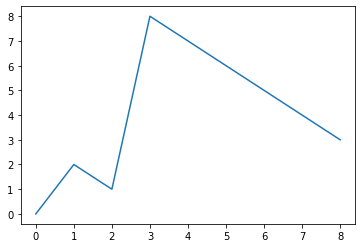

In [224]:
plot_permutation([0, 2, 1, 8, 7, 6, 5, 4, 3])

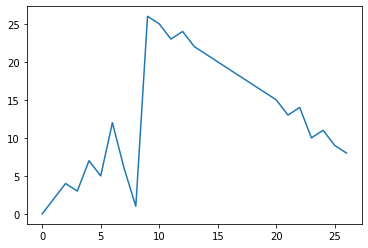

In [225]:
plot_permutation([0,
  2,
  4,
  3,
  7,
  5,
  12,
  6,
  1,
  26,
  25,
  23,
  24,
  22,
  21,
  20,
  19,
  18,
  17,
  16,
  15,
  13,
  14,
  10,
  11,
  9,
  8])

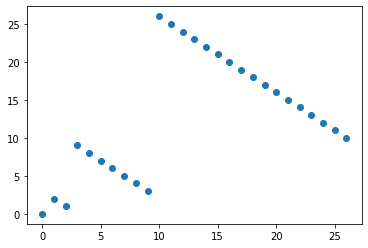

In [267]:
plot_permutation([0,2,1,9,8,7,6,5,4,3,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10])

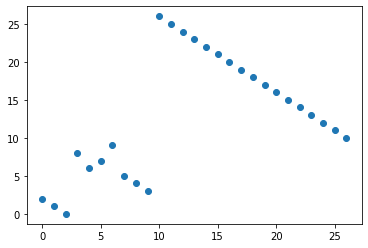

In [266]:
plot_permutation([2, 1, 0, 8, 6, 7, 9, 5, 4, 3, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10])

In [309]:
def Evolutionary_Algorithm_2413(n):
    #initialize population and compute fitness for each individual
    POP = []
    for j in range(500):
        r = random.randint(0,np.math.factorial(n)-1)
        P = unrank_permutation([i for i in range(n)],r)
        fitness = count_2413(P)
        POP = POP + [[fitness,P]]
    #sort initial population from most fit to least fit.
    POP.sort()
    POP.reverse()
    #initialize a counter for fitness evaluations
    fe = 0
    #start the loop
    while(fe<50003):
        if fe % 2500 == 0:
            print([fe],[POP[j][0] for j in range(10)],[POP[-1][0]])
            plot_permutation(POP[0][1])
            plt.show()
        #randomly select 5 from the pop
        randomset = random.sample(POP,20)
        #select the top 2 out of 5 for parents and crossover
        randomset.sort()
        P1 = randomset[-1]
        P2 = randomset[-2]
        [child1,child2] = crossover3(P1[1],P2[1])
        #apply mutation to the offspring at a 80% mutation rate
        mr = random.random()
        if mr < 0.8:
            child1 = mutation1(child1)
            child2 = mutation1(child2)
        #compute fitness for each child and increment the fitness evaluation counter
        fitness1 = count_2413(child1)
        fitness2 = count_2413(child2)
        fe = fe+2
        #include the offspring into the population, resort and delete the 2 weakest individuals.
        POP = POP + [[fitness1,child1]]
        POP = POP + [[fitness2,child2]]
        POP.sort()
        POP.reverse()
        POP[:500]
    return POP

[0] [14445, 14398, 14355, 13804, 13797, 13774, 13665, 13614, 13574, 13479] [4718]


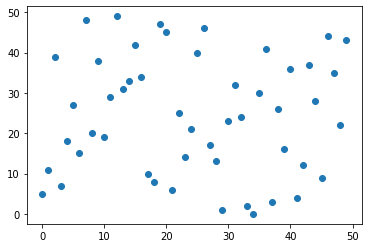

[2500] [23687, 23495, 23350, 23334, 23323, 23271, 23271, 23267, 23203, 23137] [4718]


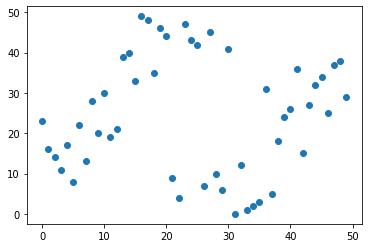

[5000] [24682, 24587, 24498, 24442, 24426, 24403, 24395, 24353, 24353, 24342] [4718]


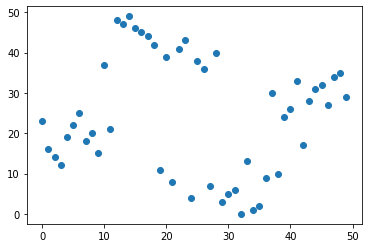

[7500] [25361, 25040, 25022, 24964, 24861, 24828, 24815, 24810, 24809, 24808] [4718]


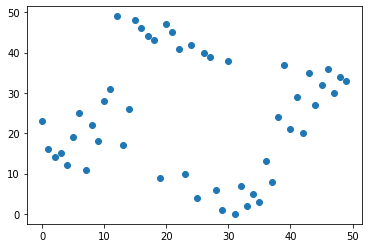

[10000] [25487, 25361, 25353, 25333, 25306, 25306, 25240, 25167, 25158, 25158] [4718]


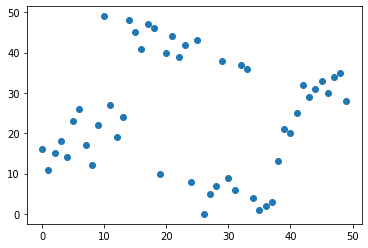

[12500] [25643, 25542, 25529, 25488, 25487, 25404, 25399, 25387, 25379, 25371] [4718]


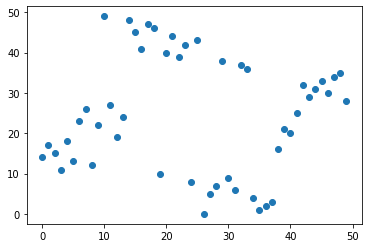

[15000] [25785, 25643, 25555, 25542, 25542, 25529, 25518, 25505, 25500, 25489] [4718]


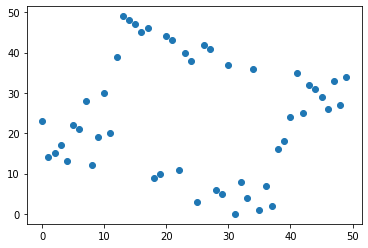

[17500] [25906, 25825, 25785, 25763, 25753, 25730, 25682, 25667, 25643, 25618] [4718]


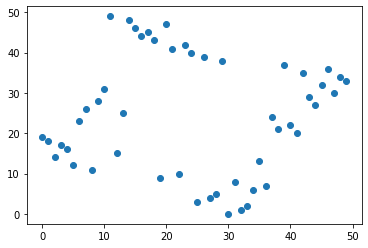

[20000] [25906, 25899, 25825, 25785, 25763, 25753, 25730, 25682, 25667, 25650] [4718]


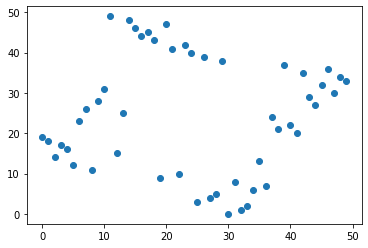

[22500] [26032, 25906, 25904, 25899, 25843, 25829, 25825, 25785, 25771, 25770] [4718]


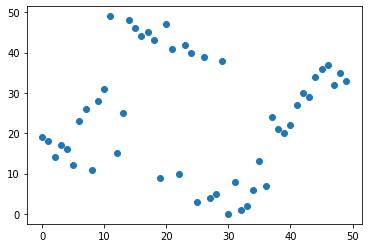

[25000] [26032, 25970, 25906, 25904, 25899, 25881, 25862, 25844, 25843, 25831] [4718]


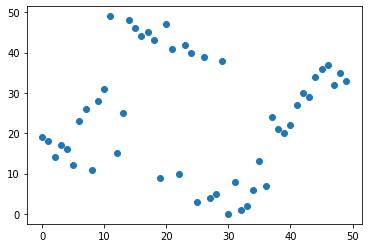

[27500] [26032, 25984, 25978, 25970, 25906, 25904, 25899, 25897, 25881, 25869] [4718]


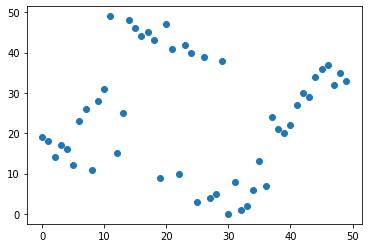

[30000] [26032, 25984, 25978, 25970, 25960, 25942, 25939, 25906, 25904, 25899] [4718]


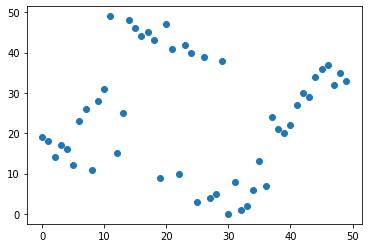

[32500] [26032, 26020, 26002, 25984, 25978, 25975, 25970, 25960, 25956, 25951] [4718]


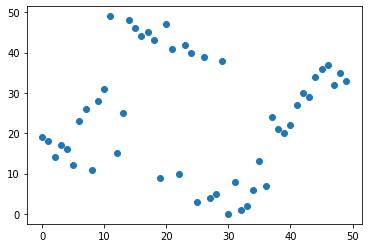

[35000] [26042, 26032, 26020, 26003, 26002, 25984, 25978, 25975, 25970, 25960] [4718]


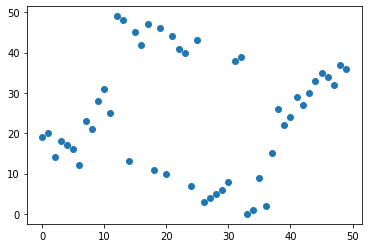

[37500] [26064, 26051, 26042, 26035, 26032, 26024, 26020, 26004, 26003, 26002] [4718]


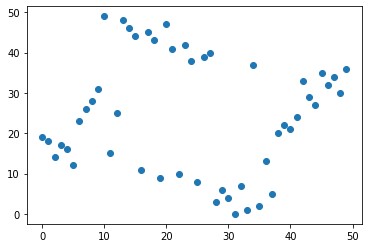

[40000] [26176, 26109, 26080, 26064, 26051, 26042, 26035, 26032, 26025, 26024] [4718]


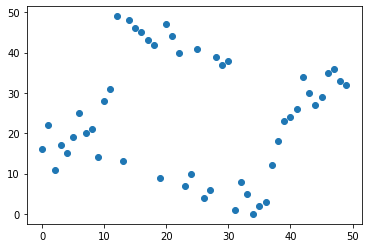

[42500] [26176, 26160, 26120, 26109, 26109, 26108, 26080, 26064, 26059, 26051] [4718]


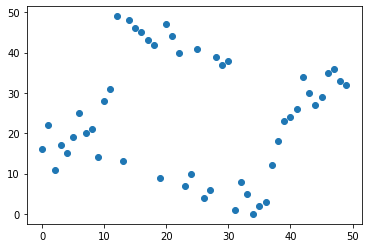

[45000] [26226, 26176, 26160, 26144, 26120, 26109, 26109, 26108, 26084, 26080] [4718]


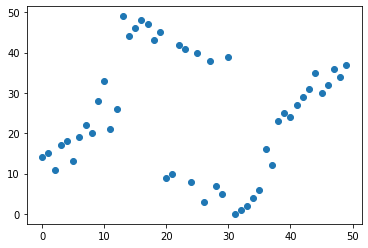

[47500] [26228, 26226, 26189, 26176, 26171, 26162, 26160, 26144, 26124, 26120] [4718]


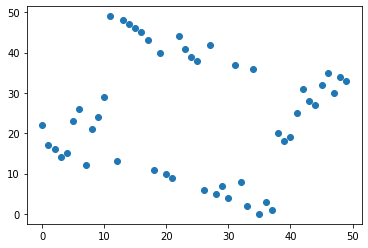

[50000] [26401, 26248, 26233, 26228, 26228, 26226, 26189, 26176, 26171, 26162] [4718]


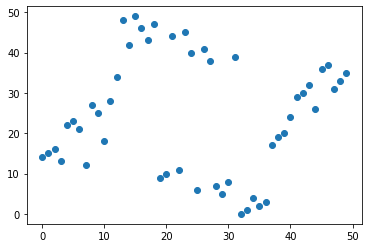

In [310]:
EA = Evolutionary_Algorithm_2413(50)

[0] [222423, 222016, 217589, 215719, 210914, 210244, 207962, 207496, 206996, 206871] [110550]


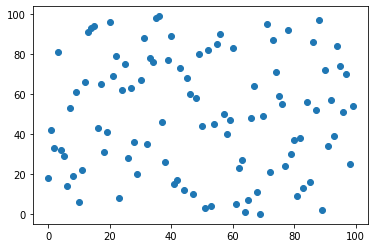

[2500] [325876, 324912, 324734, 323614, 323431, 323389, 322930, 322360, 321782, 321700] [110550]


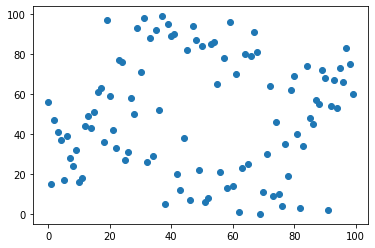

[5000] [352675, 350809, 348964, 346092, 345702, 343872, 343765, 343582, 343438, 343429] [110550]


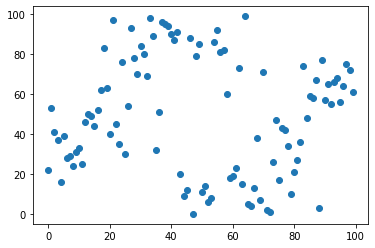

[7500] [362761, 361415, 359525, 359406, 358322, 358271, 357988, 357799, 357528, 356833] [110550]


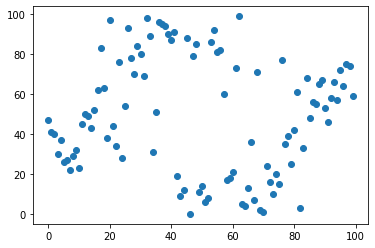

[10000] [370908, 366311, 366131, 366025, 365848, 365710, 365122, 364992, 364965, 364748] [110550]


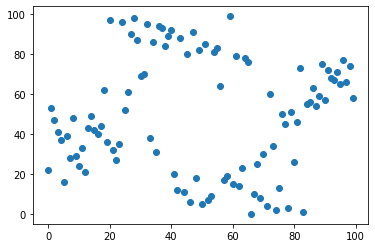

[12500] [373163, 372990, 371168, 371042, 370908, 370252, 369932, 369769, 369508, 369489] [110550]


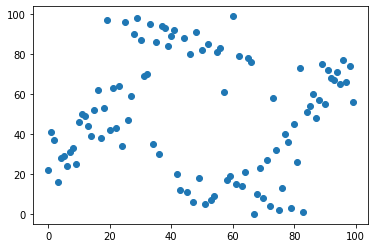

[15000] [380230, 379811, 378769, 376953, 376864, 375791, 375349, 375044, 374722, 374675] [110550]


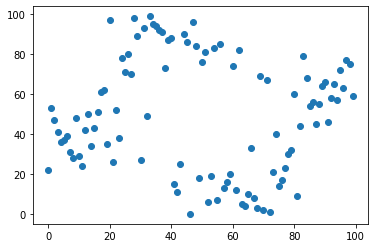

[17500] [382013, 381720, 380452, 380230, 379811, 379135, 379076, 378808, 378769, 378678] [110550]


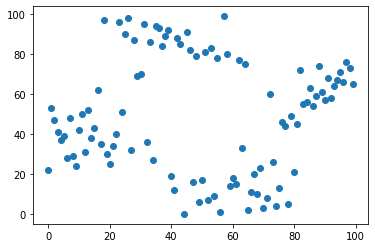

[20000] [387632, 384318, 384104, 383616, 382683, 382325, 382149, 382088, 382067, 382013] [110550]


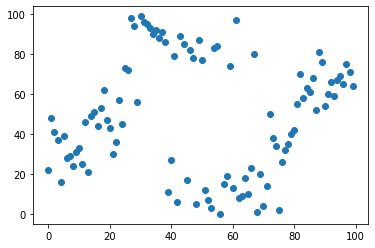

[22500] [387632, 386713, 385603, 385395, 385109, 384318, 384104, 383933, 383666, 383616] [110550]


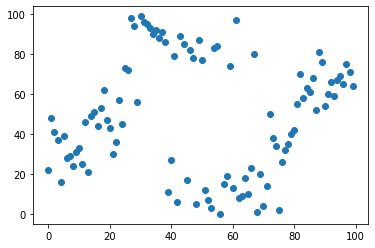

[25000] [389962, 387632, 387413, 386788, 386713, 386264, 386262, 385745, 385603, 385395] [110550]


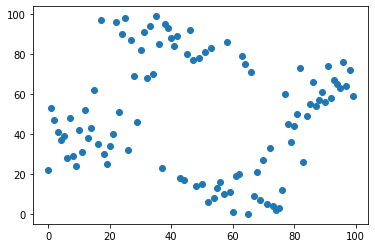

[27500] [389962, 389122, 389033, 388970, 388180, 387680, 387632, 387413, 387118, 387069] [110550]


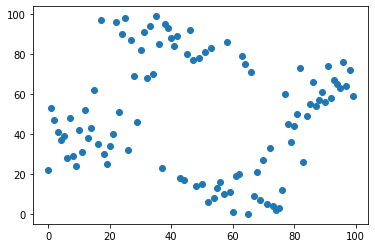

[30000] [397624, 397218, 396404, 396290, 393322, 390475, 390358, 390179, 389962, 389556] [110550]


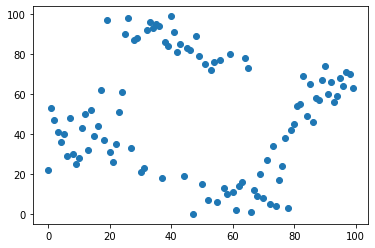

[32500] [397624, 397218, 396404, 396290, 396188, 395603, 395602, 393745, 393322, 392242] [110550]


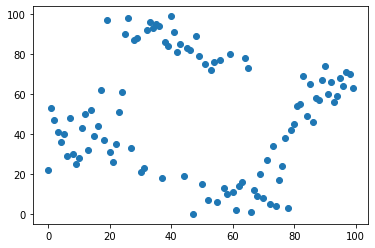

[35000] [397864, 397624, 397218, 396404, 396290, 396188, 395603, 395602, 393956, 393745] [110550]


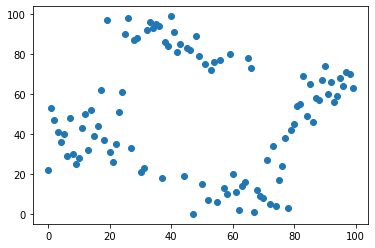

[37500] [399893, 397864, 397864, 397624, 397218, 396404, 396290, 396188, 395608, 395603] [110550]


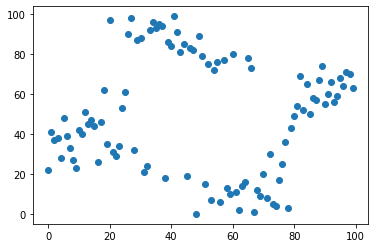

[40000] [399893, 398698, 397864, 397864, 397748, 397624, 397218, 396404, 396343, 396290] [110550]


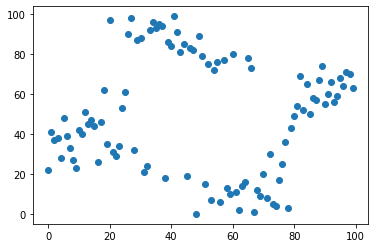

[42500] [399893, 398698, 398693, 397864, 397864, 397748, 397624, 397218, 397217, 396566] [110550]


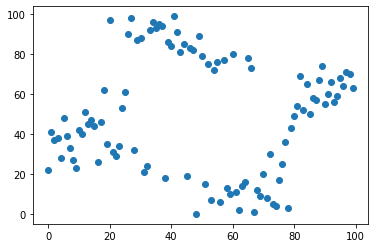

[45000] [399893, 399617, 398698, 398693, 397864, 397864, 397748, 397624, 397585, 397218] [110550]


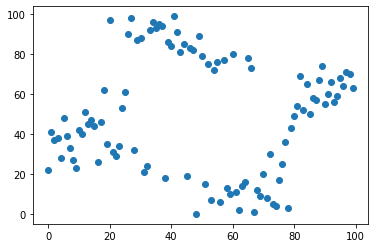

[47500] [400664, 399893, 399617, 399033, 398698, 398693, 398122, 397864, 397864, 397748] [110550]


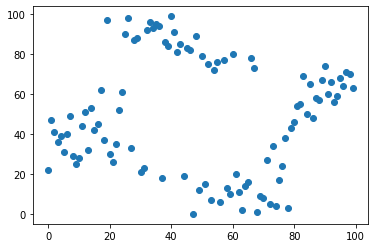

[50000] [400664, 399893, 399617, 399033, 398698, 398693, 398122, 397922, 397864, 397864] [110550]


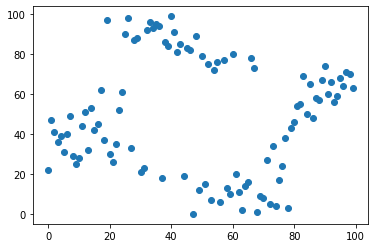

In [311]:
EA = Evolutionary_Algorithm_2413(100)

In [318]:
 def Evolutionary_Algorithm_1342(n):
    #initialize population and compute fitness for each individual
    POP = []
    for j in range(500):
        r = random.randint(0,np.math.factorial(n)-1)
        P = unrank_permutation([i for i in range(n)],r)
        fitness = count_1342(P)
        POP = POP + [[fitness,P]]
    #sort initial population from most fit to least fit.
    POP.sort()
    POP.reverse()
    #initialize a counter for fitness evaluations
    fe = 0
    #start the loop
    while(fe<50003):
        if fe % 2500 == 0:
            print([fe],[POP[j][0] for j in range(10)],[POP[-1][0]])
            plot_permutation(POP[0][1])
            plt.show()
        #randomly select 5 from the pop
        randomset = random.sample(POP,20)
        #select the top 2 out of 5 for parents and crossover
        randomset.sort()
        P1 = randomset[-1]
        P2 = randomset[-2]
        [child1,child2] = crossover3(P1[1],P2[1])
        #apply mutation to the offspring at a 80% mutation rate
        mr = random.random()
        if mr < 0.8:
            child1 = mutation1(child1)
            child2 = mutation1(child2)
        #compute fitness for each child and increment the fitness evaluation counter
        fitness1 = count_1342(child1)
        fitness2 = count_1342(child2)
        fe = fe+2
        #include the offspring into the population, resort and delete the 2 weakest individuals.
        POP = POP + [[fitness1,child1]]
        POP = POP + [[fitness2,child2]]
        POP.sort()
        POP.reverse()
        POP[:500]
    return POP

[0] [270273, 261032, 250573, 240749, 240025, 239623, 239334, 237360, 236549, 234771] [93789]


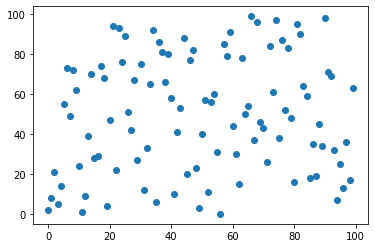

[2500] [456294, 454673, 450782, 449342, 448037, 443293, 440630, 440102, 439566, 439046] [93789]


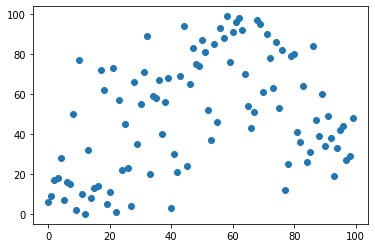

[5000] [519213, 511051, 507603, 497641, 495688, 495598, 494735, 494263, 493479, 490375] [93789]


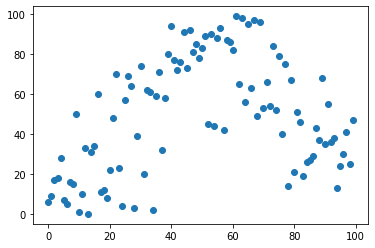

[7500] [525950, 525049, 524493, 521854, 521623, 521623, 521498, 520740, 520185, 520001] [93789]


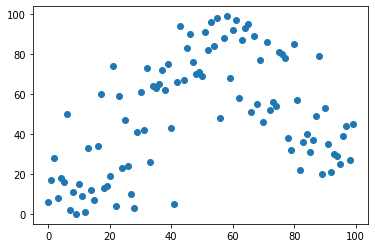

[10000] [559479, 552385, 550033, 548457, 546462, 543701, 542656, 541094, 539983, 539931] [93789]


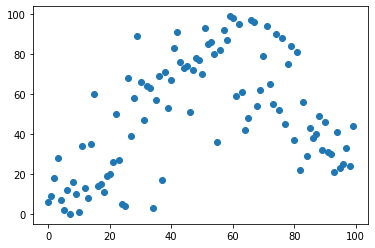

[12500] [566117, 562763, 562116, 559479, 558200, 557030, 556319, 555687, 555407, 555221] [93789]


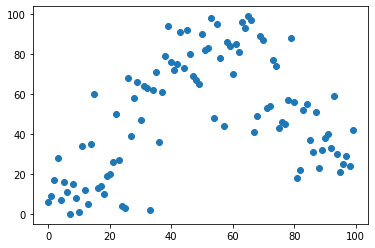

[15000] [579083, 576236, 572507, 570968, 567936, 567862, 567670, 566344, 566117, 565740] [93789]


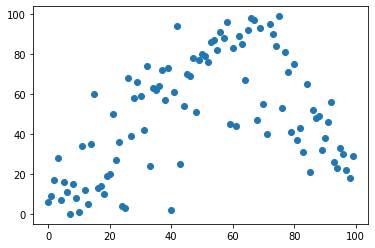

[17500] [586457, 584633, 579083, 577548, 576236, 574960, 574847, 573757, 573312, 572507] [93789]


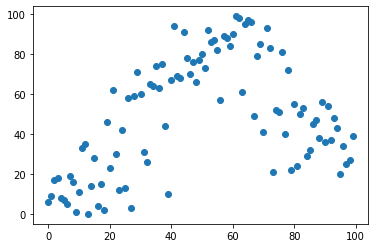

[20000] [593638, 592609, 589270, 588609, 587996, 586457, 585822, 585679, 585677, 584633] [93789]


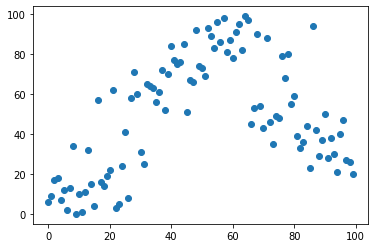

[22500] [596561, 594876, 594451, 593638, 592900, 592609, 592293, 590976, 589811, 589270] [93789]


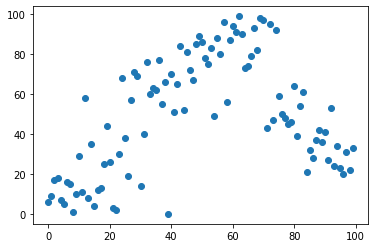

[25000] [606079, 604004, 599292, 598478, 598106, 597796, 597056, 596561, 596133, 596122] [93789]


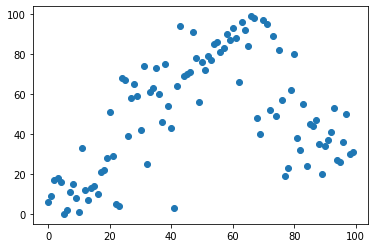

[27500] [610473, 609643, 609103, 607359, 607297, 606079, 604004, 603610, 601249, 599497] [93789]


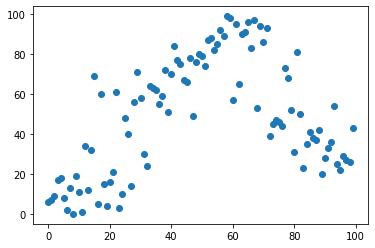

[30000] [615616, 611980, 610473, 609643, 609103, 607359, 607297, 606827, 606079, 606048] [93789]


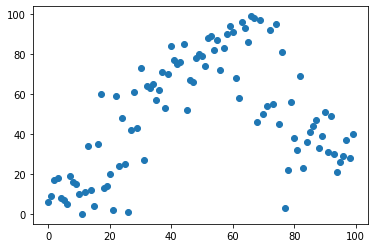

[32500] [621464, 617699, 616807, 615616, 614991, 614419, 612742, 612348, 611980, 610473] [93789]


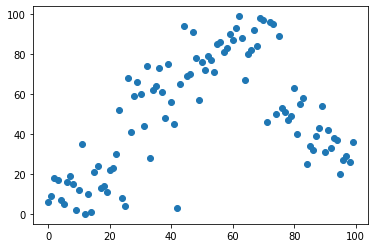

[35000] [633751, 621464, 620977, 620037, 619732, 619624, 618549, 617992, 617699, 617417] [93789]


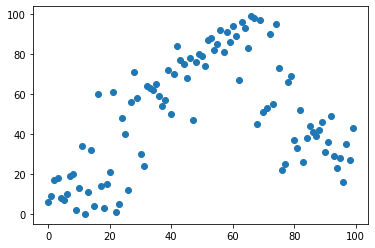

[37500] [633751, 628868, 627431, 626595, 624805, 624492, 624388, 622278, 622177, 621464] [93789]


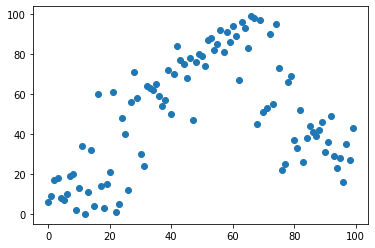

[40000] [633751, 628868, 627431, 626595, 626364, 624805, 624492, 624388, 624338, 624233] [93789]


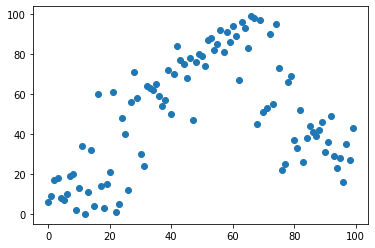

[42500] [639386, 634517, 633770, 633751, 628868, 628469, 628418, 627431, 626595, 626364] [93789]


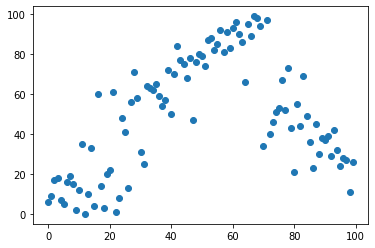

[45000] [641649, 639386, 637835, 636316, 634517, 634075, 633770, 633751, 631116, 629804] [93789]


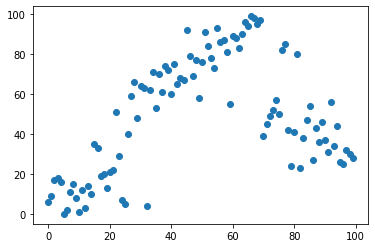

[47500] [642002, 641649, 639386, 638808, 638448, 638389, 637835, 636515, 636316, 635408] [93789]


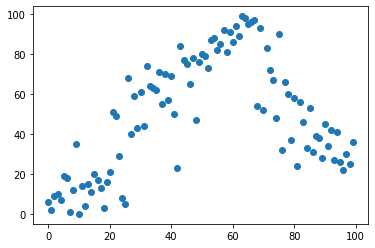

[50000] [642331, 642002, 641649, 641396, 639386, 638808, 638808, 638614, 638448, 638389] [93789]


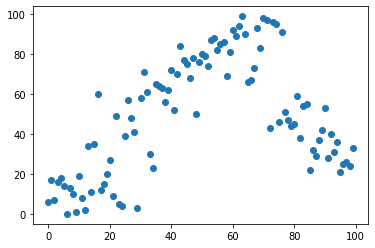

In [319]:
EA = Evolutionary_Algorithm_1342(100)

[4] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


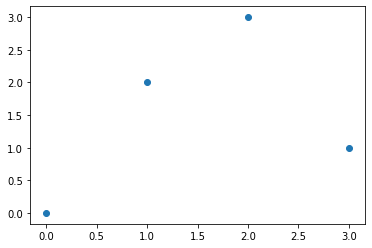

[5] [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


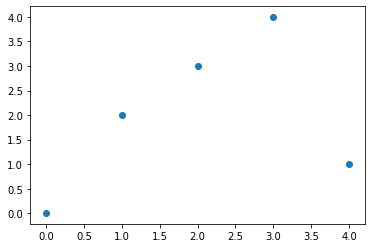

[6] [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]


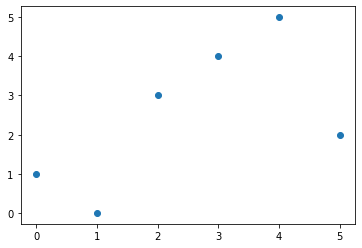

[7] [12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


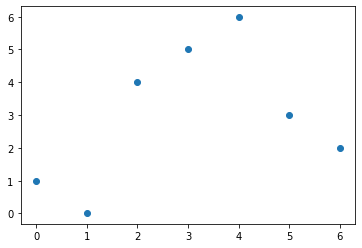

[8] [24, 24, 24, 24, 24, 24, 24, 24, 24, 24]


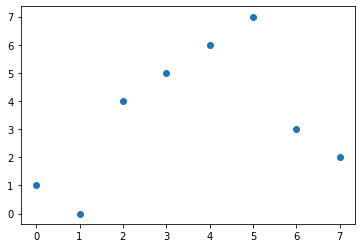

[9] [40, 40, 40, 40, 40, 40, 40, 40, 40, 40]


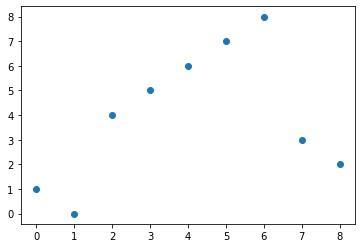

[10] [62, 62, 62, 62, 62, 62, 62, 62, 62, 62]


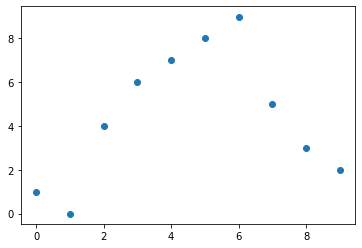

[11] [96, 96, 96, 96, 96, 96, 96, 96, 96, 96]


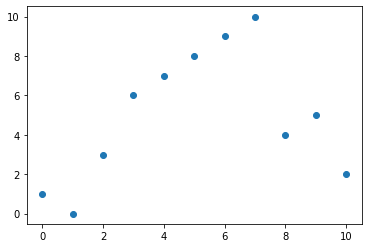

[12] [138, 138, 138, 138, 138, 138, 138, 138, 138, 138]


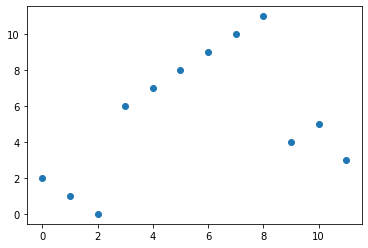

[13] [192, 192, 192, 192, 192, 192, 192, 192, 192, 192]


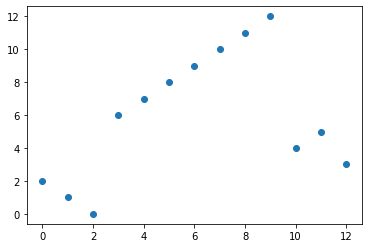

[14] [264, 264, 264, 264, 264, 264, 264, 264, 264, 264]


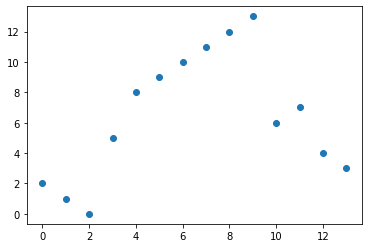

[15] [354, 354, 354, 354, 354, 354, 354, 354, 354, 354]


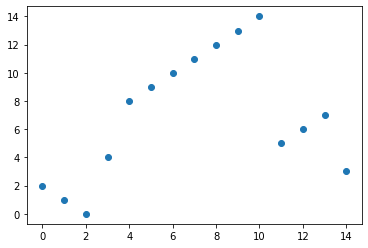

[16] [461, 461, 461, 461, 461, 461, 461, 461, 461, 461]


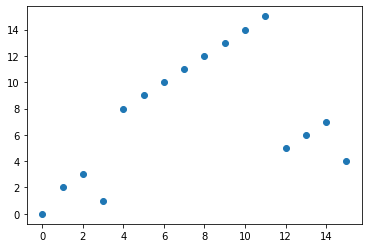

[17] [590, 590, 590, 590, 590, 590, 590, 590, 590, 590]


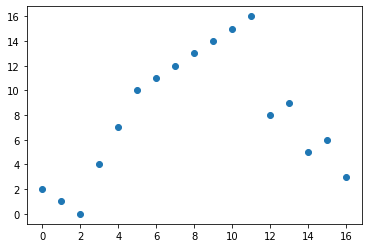

[18] [752, 752, 752, 752, 752, 752, 752, 752, 752, 752]


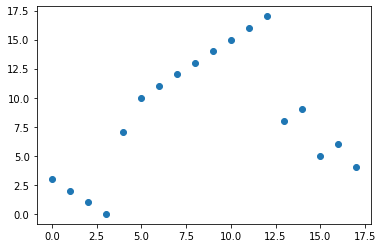

[19] [941, 941, 941, 941, 941, 941, 941, 941, 941, 941]


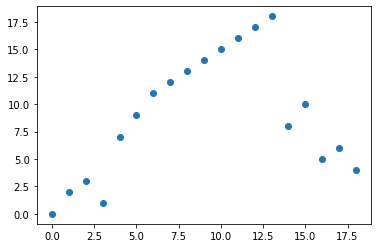

[20] [1160, 1160, 1160, 1160, 1160, 1160, 1160, 1160, 1160, 1160]


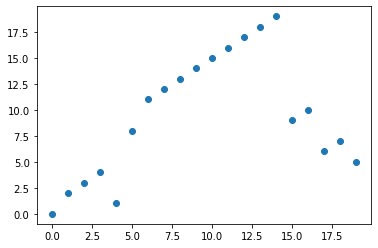

[21] [1420, 1420, 1420, 1420, 1420, 1420, 1420, 1420, 1420, 1420]


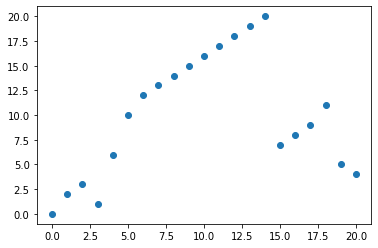

[22] [1730, 1730, 1730, 1730, 1730, 1730, 1730, 1730, 1730, 1730]


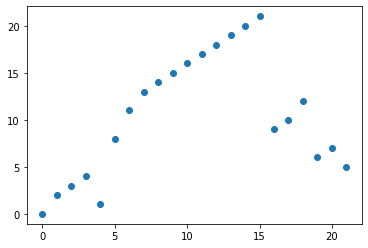

[23] [2078, 2078, 2078, 2078, 2078, 2078, 2078, 2078, 2078, 2078]


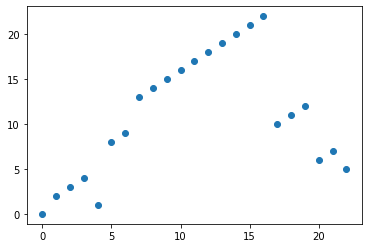

[24] [2463, 2463, 2463, 2458, 2457, 2457, 2457, 2457, 2457, 2457]


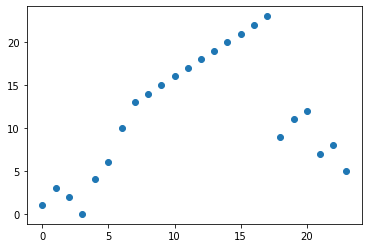

[25] [2918, 2918, 2918, 2918, 2918, 2918, 2918, 2917, 2917, 2917]


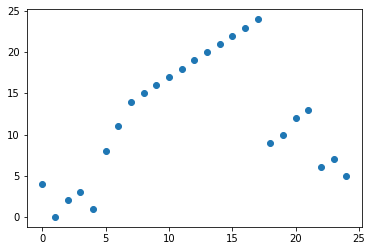

[26] [3412, 3412, 3412, 3412, 3412, 3412, 3412, 3412, 3412, 3412]


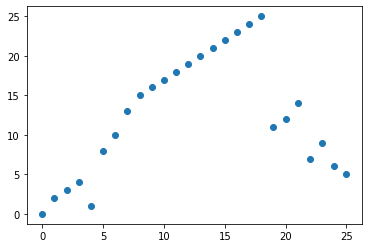

[27] [4009, 4009, 4009, 4008, 4008, 4008, 4008, 4008, 4008, 4008]


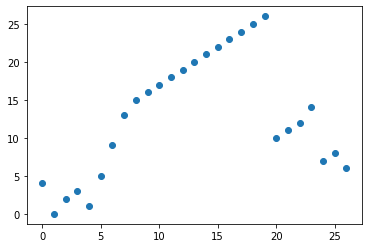

In [317]:
#This will generate a sequence to check against OEIS
for n in range(4,28):
    #initialize population and compute fitness for each individual
    POP = []
    for j in range(2500):
        r = random.randint(0,np.math.factorial(n)-1)
        P = unrank_permutation([i for i in range(n)],r)
        fitness = count_1342(P)
        POP = POP + [[fitness,P]]
    #sort initial population from most fit to least fit.
    POP.sort()
    POP.reverse()
    #initialize a counter for fitness evaluations
    fe = 0
    #start the loop
    while(fe<20001):
        #randomly select 5 from the pop
        randomset = random.sample(POP,75)
        #select the top 2 out of 5 for parents and crossover
        randomset.sort()
        P1 = randomset[-1]
        P2 = randomset[-2]
        [child1,child2] = crossover3(P1[1],P2[1])
        #apply mutation to the offspring at a 80% mutation rate
        mr = random.random()
        if mr < 0.8:
            child1 = mutation1(child1)
            child2 = mutation1(child2)
        #compute fitness for each child and increment the fitness evaluation counter
        fitness1 = count_1342(child1)
        fitness2 = count_1342(child2)
        fe = fe+2
        #include the offspring into the population, resort and delete the 2 weakest individuals.
        POP = POP + [[fitness1,child1]]
        POP = POP + [[fitness2,child2]]
        POP.sort()
        POP.reverse()
        POP[:2500]
    print([n],[POP[j][0] for j in range(10)])
    plot_permutation(POP[0][1])
    plt.show()